In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path

project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
# print(sys.path)
import matplotlib.pyplot as plt

from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# Read the data
path_to_runs = Path("../../results/simulations/withdrawal_queue_replacement/")
# path_to_runs = Path("../../results/simulations/model_validation/")
# print(path_to_runs.resolve())
# print(path_to_runs.resolve().exists())
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve())

In [ ]:
from experiments.analysis_utils.metrics import analyze_veto_timing_by_seals

veto_stats = analyze_veto_timing_by_seals(timestep_data_df_full, start_data_df_full)
veto_stats["attack_success_rate"] = 100 - veto_stats["veto_rate"]
veto_stats["n_successful_attacks"] = veto_stats["attack_success_rate"] / 100 * veto_stats["total_runs"]
print("Veto statistics by seal parameters:")
display(veto_stats)

# Example for specific seal values
# veto_seal = 0.01
# rage_seal = 0.1
# attacker_share = veto_stats.index.get_level_values('attacker_share').unique()[0]
# specific_stats = veto_stats.loc[veto_seal, rage_seal, attacker_share]
# print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}, attacker_share={attacker_share:.4f}:")
# print(f"Veto rate: {specific_stats['veto_rate']:.1f}%")
# print(f"Mean time to veto: {specific_stats['mean_time_to_veto']:.2f}")
# print(f"Median time to veto: {specific_stats['median_time_to_veto']:.2f}")
# print(f"Total runs: {specific_stats['total_runs']}")

# veto_stats.to_csv("veto_stats.csv")

Veto statistics by seal parameters:


veto_rate  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share               
0.01                         0.1                           0.25            100.000000   
                                                           0.30            100.000000   
                                                           0.35             98.673469   
                                                           0.40             89.081633   
                                                           0.45             59.285714   
                                                           0.50             18.163265   
                                                           0.55              0.510204   

                                                                           mean_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                      
0.01                         0.1                           0.25                    28.940000   
                                                           0.30                    30.013913   
                                                           0.35                    31.478800   
                                                           0.40                    33.247423   
                                                           0.45                    35.153184   
                                                           0.50                    37.106742   
                                                           0.55                    37.800000   

                                                                           median_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                        
0.01                         0.1                           0.25                           29.0   
                                                           0.30                           30.0   
                                                           0.35                           31.0   
                                                           0.40                           33.0   
                                                           0.45                           35.0   
                                                           0.50                           37.0   
                                                           0.55                           37.0   

                                                                           hours_mean_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                  
0.01                         0.1                           0.25                                86.820000   
                                                           0.30                                90.041739   
                                                           0.35                                94.436401   
                                                           0.40                                99.742268   
                                                           0.45                               105.459552   
                                                           0.50                               111.320225   
                                                           0.55                               113.400000   

                                                                           hours_median_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                    
0.01                         0.1                           0.25                                       87.0   
                                                           0.30                                       90.0   
                                                           0.35                                       93.0   
   

/Users/bach/Work/Blockchain/Lido/dg-cadcad/experiments/analysis_utils/visualization.py:346: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in current_values])


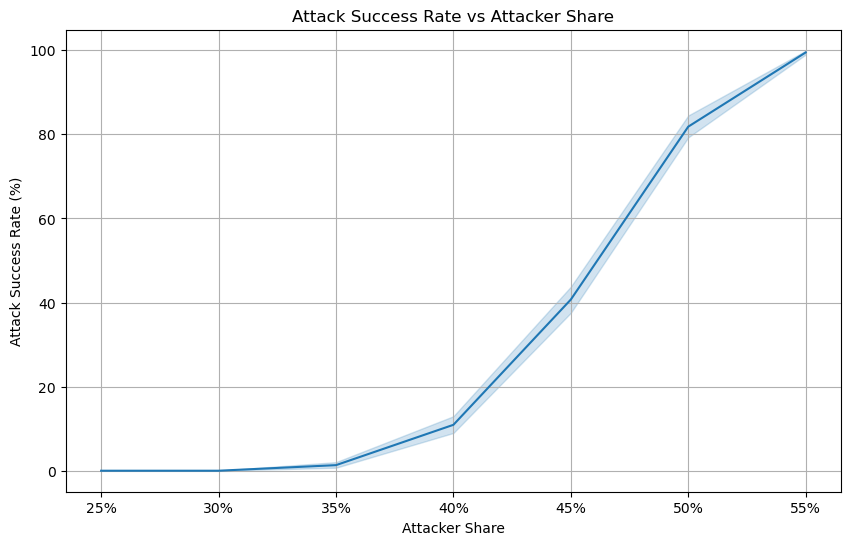

In [ ]:
from experiments.analysis_utils.visualization import plot_attack_success_rate

plot_attack_success_rate(timestep_data_df_full, start_data_df_full)

/Users/bach/Work/Blockchain/Lido/dg-cadcad/experiments/analysis_utils/visualization.py:381: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

/Users/bach/Work/Blockchain/Lido/dg-cadcad/experiments/analysis_utils/visualization.py:394: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


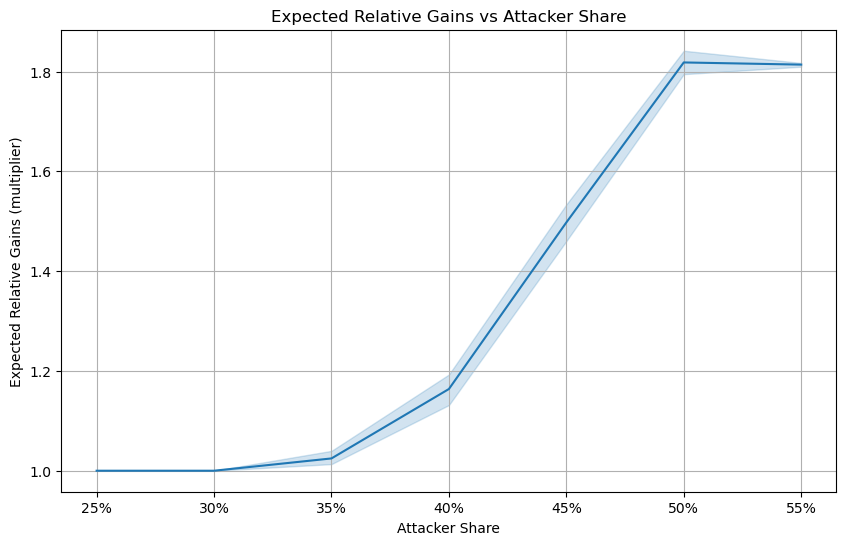

In [ ]:
from experiments.analysis_utils.visualization import plot_expected_attacker_gains

plot_expected_attacker_gains(timestep_data_df_full, start_data_df_full)

### End of analysis


In [ ]:
veto_stats2 = veto_stats.reset_index()
veto_stats2["expected_attacker_gains"] = (1 - veto_stats2["attacker_share"]) * veto_stats2["attack_success_rate"]
veto_stats2

,first_seal_rage_quit_support,second_seal_rage_quit_support,attacker_share,veto_rate,mean_time_to_veto,median_time_to_veto,hours_mean_time_to_veto_hours,hours_median_time_to_veto_hours,total_runs,attack_success_rate,n_successful_attacks,expected_attacker_gains
0,0.01,0.1,0.25,100.000000,28.940000,29.0,86.820000,87.0,1150,0.000000,0.0,0.000000
1,0.01,0.1,0.30,100.000000,30.013913,30.0,90.041739,90.0,1150,0.000000,0.0,0.000000
2,0.01,0.1,0.35,98.673469,31.478800,31.0,94.436401,93.0,980,1.326531,13.0,0.862245
3,0.01,0.1,0.40,89.081633,33.247423,33.0,99.742268,99.0,980,10.918367,107.0,6.551020
4,0.01,0.1,0.45,59.285714,35.153184,35.0,105.459552,105.0,980,40.714286,399.0,22.392857
5,0.01,0.1,0.50,18.163265,37.106742,37.0,111.320225,111.0,980,81.836735,802.0,40.918367
6,0.01,0.1,0.55,0.510204,37.800000,37.0,113.400000,111.0,980,99.489796,975.0,44.770408


In [ ]:
timestep_data_df_full_with_params = timestep_data_df_full.merge(
    start_data_df_full[["run_id", "first_seal_rage_quit_support", "second_seal_rage_quit_support", "attacker_share"]],
    on="run_id",
)

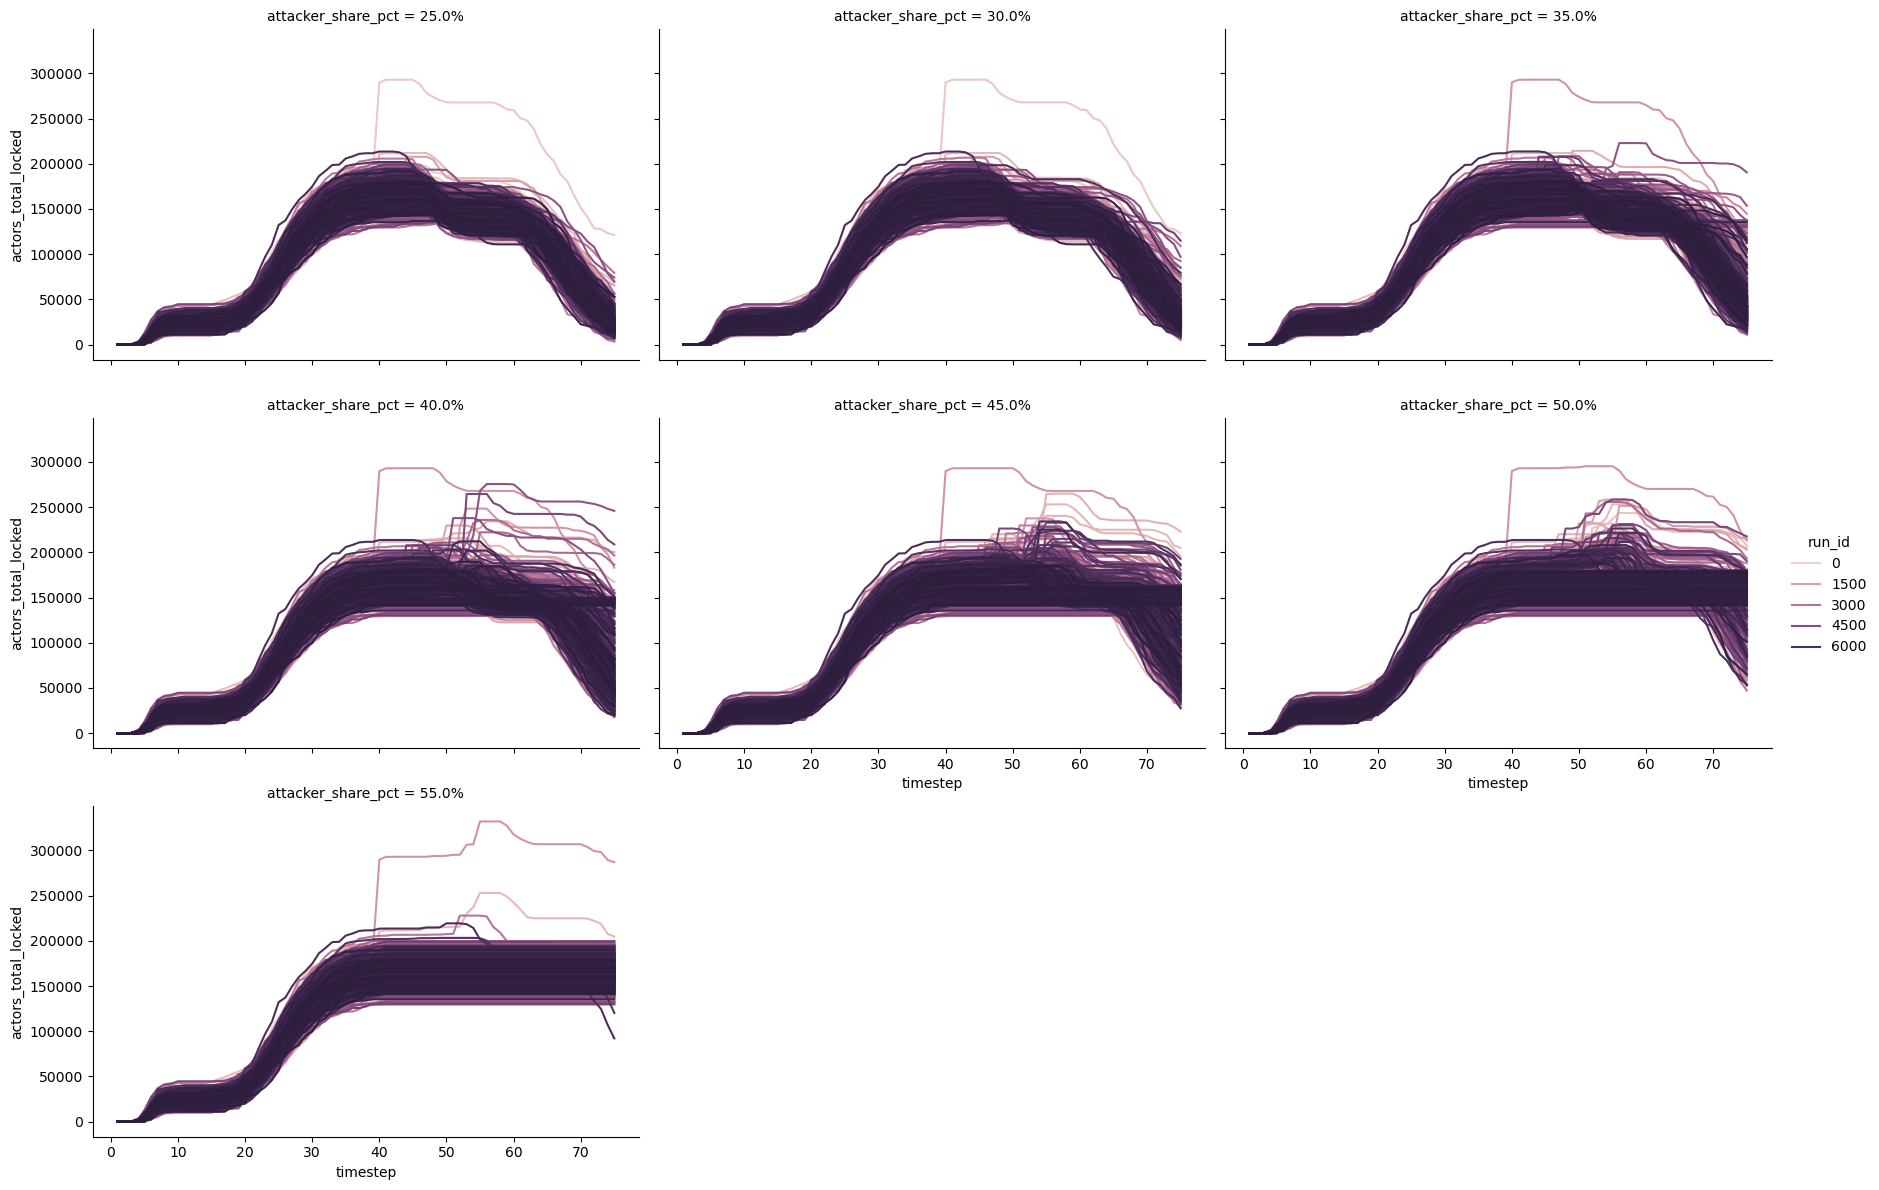

In [ ]:
import seaborn as sns

# fig, ax = plt.subplots(figsize=(10, 10))
# Format attacker_share as percentage before plotting
timestep_data_df_full_with_params["attacker_share_pct"] = (
    timestep_data_df_full_with_params["attacker_share"] * 100
).round(1).astype(str) + "%"

col_order = sorted(timestep_data_df_full_with_params["attacker_share_pct"].unique(), key=lambda x: float(x.strip("%")))

# Plot using the formatted column
sns.relplot(
    data=timestep_data_df_full_with_params,
    x="timestep",
    y="actors_total_locked",
    hue="run_id",
    col="attacker_share_pct",  # Use the formatted column
    kind="line",
    estimator=None,
    col_wrap=3,
    height=4,
    aspect=1.5,
    col_order=col_order,  # Maintain the order of columns
)
# ax.legend([])
# ax2 = ax.twinx()
# sns.lineplot(data=timestep_data_df_full, x='timestep', y='dg_state_value', ax=ax2, estimator=None, hue='')
# ax2.legend([])

In [ ]:
from experiments.analysis_utils.metrics import calculate_time_to_first_veto

veto_times = calculate_time_to_first_veto(timestep_data_df_full)

# Basic statistics
print("Time to first veto statistics:")
print(f"Runs with vetoes: {veto_times['time_to_first_veto'].notna().sum()}")
print(f"Runs without vetoes: {veto_times['time_to_first_veto'].isna().sum()}")
print("\nFor runs with vetoes:")
print(f"Mean time to first veto: {veto_times['time_to_first_veto'].mean():.2f}")
print(f"Median time to first veto: {veto_times['time_to_first_veto'].median():.2f}")

# With seal parameters
veto_times_with_params = veto_times.merge(
    start_data_df_full[["run_id", "first_seal_rage_quit_support", "second_seal_rage_quit_support"]], on="run_id"
)

Time to first veto statistics:
Runs with vetoes: 4604
Runs without vetoes: 2296

For runs with vetoes:
Mean time to first veto: 31.64
Median time to first veto: 31.00


In [ ]:
timestep_data_df_full_with_first_veto = timestep_data_df_full.merge(
    veto_times_with_params[["run_id", "time_to_first_veto"]], on="run_id", how="left"
)

pre_veto_states = timestep_data_df_full_with_first_veto[
    timestep_data_df_full_with_first_veto["timestep"] == timestep_data_df_full_with_first_veto["time_to_first_veto"] - 1
]

# Display the results
pre_veto_states

,timestep,simulation_hash,dg_state_value,dg_state_name,dg_rage_quit_support,dg_dynamic_timelock_seconds,actors_total_balance,actors_total_locked,actors_total_number,actors_total_number_locked,...,recovery_CoordinatedDefender,actors_locked_CoordinatedDefender,actors_affected_CoordinatedDefender,actors_quit_CoordinatedDefender,quit_CoordinatedDefender,actors_total_balance_relative,actors_total_locked_relative,actors_total_health_relative,run_id,time_to_first_veto
104,27,322fb15ef18885251d5a89403a6c3628208c038a1c1ee6...,1,Normal,9385514015580912,0,1.188259e+07,112580.799457,1986,161,...,0,0,0,0,0.0,0.990614,0.009386,1.0,0,28.0
105,27,322fb15ef18885251d5a89403a6c3628208c038a1c1ee6...,1,Normal,9385514015580912,0,1.188259e+07,112580.799457,1986,161,...,0,0,0,0,0.0,0.990614,0.009386,1.0,0,28.0
106,27,322fb15ef18885251d5a89403a6c3628208c038a1c1ee6...,1,Normal,9385514015580912,0,1.188259e+07,112580.799457,1986,161,...,0,0,0,0,0.0,0.990614,0.009386,1.0,0,28.0
107,27,322fb15ef18885251d5a89403a6c3628208c038a1c1ee6...,1,Normal,9385514015580912,0,1.188259e+07,112580.799457,1986,161,...,0,0,0,0,0.0,0.990614,0.009386,1.0,0,28.0
332,33,97d676277be8f222354f6a4d88168c2291abe015b9dfec...,1,Normal,9955388065625416,0,1.484469e+07,149270.666672,1986,226,...,0,0,0,0,0.0,0.990045,0.009955,1.0,1,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569437,38,be64aa3c7c0723e5a7363c50a4f978d01129a5ce508b4c...,1,Normal,9954616623868858,0,1.619422e+07,162828.108771,1986,253,...,0,0,0,0,0.0,0.990045,0.009955,1.0,6896,39.0
569804,27,730b352ba873efabb4caa14b48007fbd979ad89bbdc4da...,1,Normal,9840058241409750,0,1.187713e+07,118033.132941,1986,169,...,0,0,0,0,0.0,0.990160,0.009840,1.0,2496,28.0
569805,27,730b352ba873efabb4caa14b48007fbd979ad89bbdc4da...,1,Normal,9840058241409750,0,1.187713e+07,118033.132941,1986,169,...,0,0,0,0,0.0,0.990160,0.009840,1.0,2496,28.0
569806,27,730b352ba873efabb4caa14b48007fbd979ad89bbdc4da...,1,Normal,9840058241409750,0,1.187713e+07,118033.132941,1986,169,...,0,0,0,0,0.0,0.990160,0.009840,1.0,2496,28.0


In [ ]:
from experiments.analysis_utils.metrics import calculate_pre_first_veto_stats

pre_first_veto_stats = calculate_pre_first_veto_stats(timestep_data_df_full, start_data_df_full)
pre_first_veto_stats

actors_locked_Slow_mean  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                            
0.01                         0.1                           0.25                           0.000000   
                                                           0.30                           0.000000   
                                                           0.35                           0.000000   
                                                           0.40                           0.000000   
                                                           0.45                           0.001721   
                                                           0.50                           0.005618   
                                                           0.55                           0.000000   

                                                                           actors_locked_Slow_median  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                              
0.01                         0.1                           0.25                                  0.0   
                                                           0.30                                  0.0   
                                                           0.35                                  0.0   
                                                           0.40                                  0.0   
                                                           0.45                                  0.0   
                                                           0.50                                  0.0   
                                                           0.55                                  0.0   

                                                                           actors_locked_Slow_std  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                           
0.01                         0.1                           0.25                          0.000000   
                                                           0.30                          0.000000   
                                                           0.35                          0.000000   
                                                           0.40                          0.000000   
                                                           0.45                          0.041487   
                                                           0.50                          0.074953   
                                                           0.55                          0.000000   

                                                                           actors_locked_Normal_mean  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                              
0.01                         0.1                           0.25                           135.250370   
                                                           0.30                           148.426667   
                                                           0.35                           163.657704   
                                                           0.40                           180.147766   
                                                           0.45                           196.506024   
                                                           0.50                           213.000000   
                                                           0.55                           220.800000   

                                                                           actors_locked_Normal_median  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                
0.01                         0.1                           0.25                                  135.0   
                                                      

/Users/bach/Work/Blockchain/Lido/dg-cadcad/experiments/analysis_utils/visualization.py:248: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(label.get_text())*100:.2f}%' for label in current_labels])


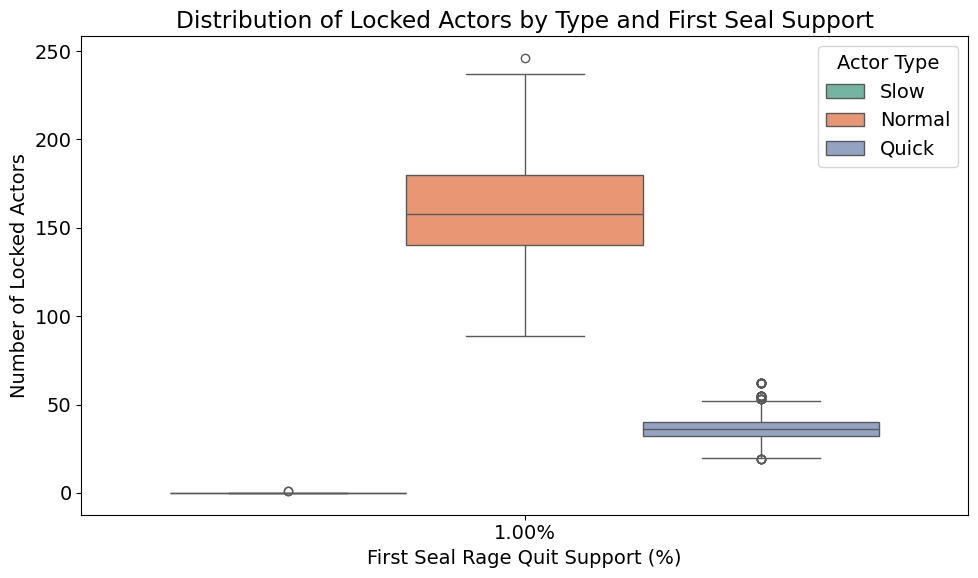

In [ ]:
from experiments.analysis_utils.visualization import plot_pre_veto_locked_by_reaction_time_distributions

plot_pre_veto_locked_by_reaction_time_distributions(timestep_data_df_full, start_data_df_full)

/Users/bach/Work/Blockchain/Lido/dg-cadcad/experiments/analysis_utils/visualization.py:248: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{float(label.get_text())*100:.2f}%' for label in current_labels])


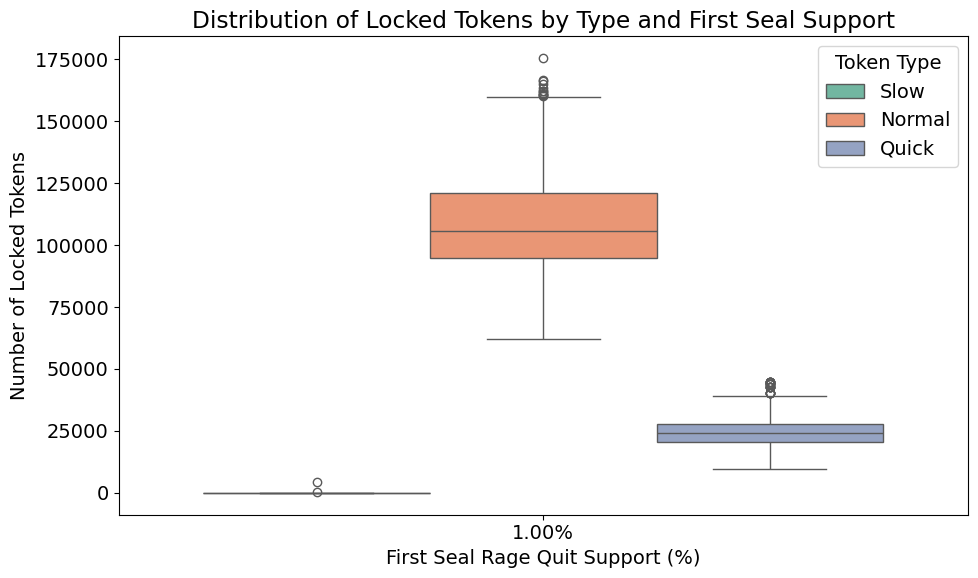

In [ ]:
from experiments.analysis_utils.visualization import plot_pre_veto_locked_by_reaction_time_distributions

plot_pre_veto_locked_by_reaction_time_distributions(
    timestep_data_df_full, start_data_df_full, plot_token_distribution=True
)

Veto statistics by seal parameters:


veto_rate  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share               
0.01                         0.1                           0.10            100.000000   
                                                           0.20            100.000000   
                                                           0.30            100.000000   
                                                           0.35             99.000000   
                                                           0.40             87.474747   
                                                           0.45             59.797980   
                                                           0.50              6.000000   
                                                           0.55              0.000000   

                                                                           mean_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                      
0.01                         0.1                           0.10                    27.040000   
                                                           0.20                    28.340000   
                                                           0.30                    30.300000   
                                                           0.35                    31.565657   
                                                           0.40                    33.200924   
                                                           0.45                    35.175676   
                                                           0.50                    39.333333   
                                                           0.55                          NaN   

                                                                           median_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                        
0.01                         0.1                           0.10                           27.0   
                                                           0.20                           28.0   
                                                           0.30                           30.0   
                                                           0.35                           31.0   
                                                           0.40                           33.0   
                                                           0.45                           35.0   
                                                           0.50                           39.0   
                                                           0.55                            NaN   

                                                                           hours_mean_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                  
0.01                         0.1                           0.10                                81.120000   
                                                           0.20                                85.020000   
                                                           0.30                                90.900000   
                                                           0.35                                94.696970   
                                                           0.40                                99.602771   
                                                           0.45                               105.527027   
                                                           0.50                               118.000000   
                                                           0.55                                      NaN   

                                                                           hours_median_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_s


Statistics for veto_seal=0.01, rage_seal=0.1, attacker_share=0.1000:
Veto rate: 100.0%
Mean time to veto: 27.04
Median time to veto: 27.00
Total runs: 50.0


/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:346: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f'{x:.0%}' for x in current_values])


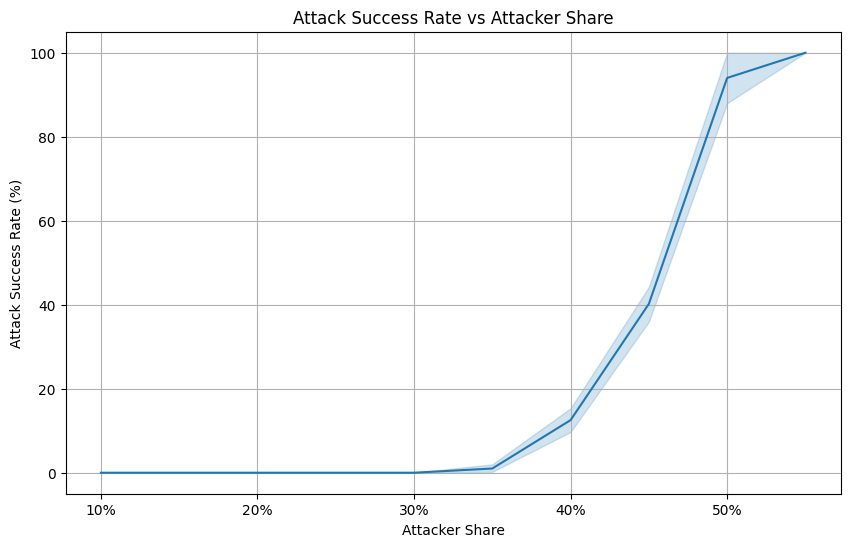

In [47]:
1055 / 1500

0.7033333333333334

In [ ]:
total_balance = 8996374.56750506
veto_stats_2 = veto_stats.reset_index()
veto_stats_2["expected_attacker_gains"] = (
    veto_stats_2["attack_success_rate"] / 100 * total_balance * (1 - veto_stats_2["attacker_share"])
)
veto_stats_2["expected_attacker_relative_gains"] = veto_stats_2["expected_attacker_gains"] / (
    veto_stats_2["attacker_share"] * total_balance
)
veto_stats_2

,first_seal_rage_quit_support,second_seal_rage_quit_support,attacker_share,veto_rate,mean_time_to_veto,median_time_to_veto,hours_mean_time_to_veto_hours,hours_median_time_to_veto_hours,total_runs,attack_success_rate,n_successful_attacks,expected_attacker_gains,expected_attacker_relative_gains
0,0.01,0.1,0.25,100.000000,28.940000,29.0,86.820000,87.0,1150,0.000000,0.0,0.000000e+00,0.000000
1,0.01,0.1,0.30,100.000000,30.013913,30.0,90.041739,90.0,1150,0.000000,0.0,0.000000e+00,0.000000
2,0.01,0.1,0.35,98.673469,31.478800,31.0,94.436401,93.0,980,1.326531,13.0,7.757078e+04,0.024636
3,0.01,0.1,0.40,89.081633,33.247423,33.0,99.742268,99.0,980,10.918367,107.0,5.893543e+05,0.163776
4,0.01,0.1,0.45,59.285714,35.153184,35.0,105.459552,105.0,980,40.714286,399.0,2.014545e+06,0.497619
5,0.01,0.1,0.50,18.163265,37.106742,37.0,111.320225,111.0,980,81.836735,802.0,3.681170e+06,0.818367
6,0.01,0.1,0.55,0.510204,37.800000,37.0,113.400000,111.0,980,99.489796,975.0,4.027714e+06,0.814007


In [ ]:
from experiments.analysis_utils.metrics import calculate_proposal_stats_by_seals

stats_by_seals = calculate_proposal_stats_by_seals(proposal_df_full, start_data_df_full)
print("Proposal statistics by seal parameters:")
display(stats_by_seals)

# # Example for specific seal values
# veto_seal = 0.01
# rage_seal = 0.1
# specific_stats = stats_by_seals.loc[veto_seal, rage_seal]
# print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}:")
# print(f"Total proposals: {specific_stats['total_proposals']}")
# for status, percentage in specific_stats.items():
#     if status != 'total_proposals':
#         print(f"{status}: {percentage:.1f}%")

Proposal statistics by seal parameters:


total_proposals  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                    
0.01                         0.1                           0.25                       1350   
                                                           0.30                       1350   
                                                           0.35                        980   
                                                           0.40                        980   
                                                           0.45                        980   
                                                           0.50                        980   
                                                           0.55                        980   

                                                                            Cancelled  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share               
0.01                         0.1                           0.25            100.000000   
                                                           0.30            100.000000   
                                                           0.35             98.673469   
                                                           0.40             89.081633   
                                                           0.45             59.285714   
                                                           0.50             18.163265   
                                                           0.55              0.510204   

                                                                            Executed  
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share             
0.01                         0.1                           0.25             0.000000  
                                                           0.30             0.000000  
                                                           0.35             1.326531  
                                                           0.40            10.918367  
                                                           0.45            40.714286  
                                                           0.50            81.836735  
                                                           0.55            99.489796

<Axes: title={'center': 'Actors reaction speed'}>

<Figure size 1000x800 with 0 Axes>

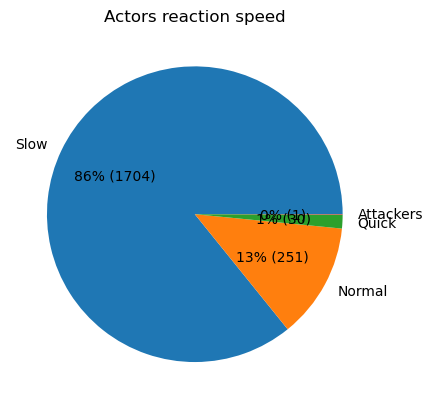

In [ ]:
# Get data for a single run (using first run as example)
run_id = start_data_df_full["run_id"].iloc[0]

# Create the plot
plt.figure(figsize=(10, 8))
plot_reaction_speed_distribution(start_data_df_full, run_id=run_id)
# plt.show()

<Axes: title={'center': 'Tokens by reaction speed'}>

<Figure size 1000x800 with 0 Axes>

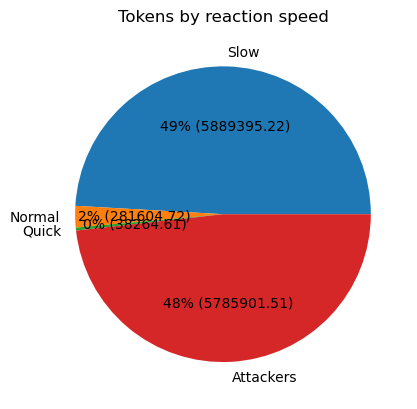

In [51]:
plt.figure(figsize=(10, 8))
plot_token_distribution(timestep_data_df_full, run_id=run_id)